# Introduction

It is basic EDA for PlantPathology Apple Dataset.

Enjoy it! :)


<br/>
**references**
* https://www.kaggle.com/tarunpaparaju/plant-pathology-2020-eda-models

In [1]:
import cv2
import math
import numpy as np
import scipy as sp
import pandas as pd

In [2]:
image_path = "../input/images/"
train_path = "../input/train.csv"

train_data = pd.read_csv(train_path)

sample_index = 5000
sample_len = 5100

# Pie chart

In [3]:
import plotly.graph_objects as go

In [4]:
fig = go.Figure([go.Pie(labels=train_data.columns[1:],
           values=train_data.iloc[:, 1:].sum().values)])
fig.update_layout(title_text="Pie chart of targets", template="simple_white")
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
fig.show()

# Load images

In [5]:
from tqdm import tqdm
tqdm.pandas()

/opt/conda/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning:

The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version



In [6]:
def load_image(image_id):
    file_path = image_id + ".jpg"
    image = cv2.imread(image_path + file_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

train_images = train_data["image_id"][sample_index:sample_len].progress_apply(load_image)

100%|██████████| 100/100 [00:00<00:00, 252.90it/s]


### Sample Image

In [7]:
import plotly.express as px

In [8]:
fig = px.imshow(cv2.resize(train_images[sample_index], (512, 512)))
fig.show()

## Channel distributions

In [9]:
red_values = [np.mean(train_images[sample_index + idx][:, :, 0]) for idx in range(len(train_images))]
green_values = [np.mean(train_images[sample_index + idx][:, :, 1]) for idx in range(len(train_images))]
blue_values = [np.mean(train_images[sample_index + idx][:, :, 2]) for idx in range(len(train_images))]
values = [np.mean(train_images[sample_index + idx]) for idx in range(len(train_images))]

### All channel values

In [10]:
import plotly.figure_factory as ff

fig = ff.create_distplot([values], group_labels=["Channels"], colors=["purple"])
fig.update_layout(showlegend=False, template="simple_white")
fig.update_layout(title_text="Distribution of channel values")
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
fig

### Red channel values

In [11]:
fig = ff.create_distplot([red_values], group_labels=["R"], colors=["red"])
fig.update_layout(showlegend=False, template="simple_white")
fig.update_layout(title_text="Distribution of red channel values")
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
fig

### Green channel values

In [12]:
fig = ff.create_distplot([green_values], group_labels=["G"], colors=["green"])
fig.update_layout(showlegend=False, template="simple_white")
fig.update_layout(title_text="Distribution of green channel values")
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
fig

### Blue channel values

In [13]:
fig = ff.create_distplot([blue_values], group_labels=["B"], colors=["blue"])
fig.update_layout(showlegend=False, template="simple_white")
fig.update_layout(title_text="Distribution of blue channel values")
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
fig

### All channel values

In [14]:
fig = go.Figure()

for idx, values in enumerate([red_values, green_values, blue_values]):
    if idx == 0:
        color = "Red"
    if idx == 1:
        color = "Green"
    if idx == 2:
        color = "Blue"
    fig.add_trace(go.Box(x=[color]*len(values), y=values, name=color, marker=dict(color=color.lower())))
    
fig.update_layout(yaxis_title="Mean value", xaxis_title="Color channel",
                  title="Mean value vs. Color channel", template="plotly_white")

In [15]:
fig = ff.create_distplot([red_values, green_values, blue_values],
                         group_labels=["R", "G", "B"],
                         colors=["red", "green", "blue"])
fig.update_layout(title_text="Distribution of red channel values", template="simple_white")
fig.data[0].marker.line.color = 'rgb(0, 0, 0)'
fig.data[0].marker.line.width = 0.5
fig.data[1].marker.line.color = 'rgb(0, 0, 0)'
fig.data[1].marker.line.width = 0.5
fig.data[2].marker.line.color = 'rgb(0, 0, 0)'
fig.data[2].marker.line.width = 0.5
fig

## Visualize sample leaves

In [16]:
import matplotlib.pyplot as plt

### Healthy

In [17]:
def visualize_leaves(cond=[0, 0, 0, 0], cond_cols=["healthy"], is_cond=True):
    if not is_cond:
        cols, rows = 3, min([3, len(train_images)//3])
        fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(30, rows*20/3))
        for col in range(cols):
            for row in range(rows):
                ax[row, col].imshow(train_images.loc[train_images.index[-row*3-col-1]])
        return None
        
    cond_0 = "healthy == {}".format(cond[0])
    cond_1 = "scab == {}".format(cond[1])
    cond_2 = "rust == {}".format(cond[2])
    cond_3 = "multiple_diseases == {}".format(cond[3])
    
    cond_list = []
    for col in cond_cols:
        if col == "healthy":
            cond_list.append(cond_0)
        if col == "scab":
            cond_list.append(cond_1)
        if col == "rust":
            cond_list.append(cond_2)
        if col == "multiple_diseases":
            cond_list.append(cond_3)
    
    data = train_data.loc[sample_index:sample_len]
    for cond in cond_list:
        data = data.query(cond)
        
    #images = train_images.loc[list(data.index)]
    images = train_images.loc[sample_index:sample_len]
    cols, rows = 3, min([3, len(images)//3])
    
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(30, rows*20/3))
    for col in range(cols):
        for row in range(rows):
            ax[row, col].imshow(images.loc[images.index[row*3+col]])
    plt.show()

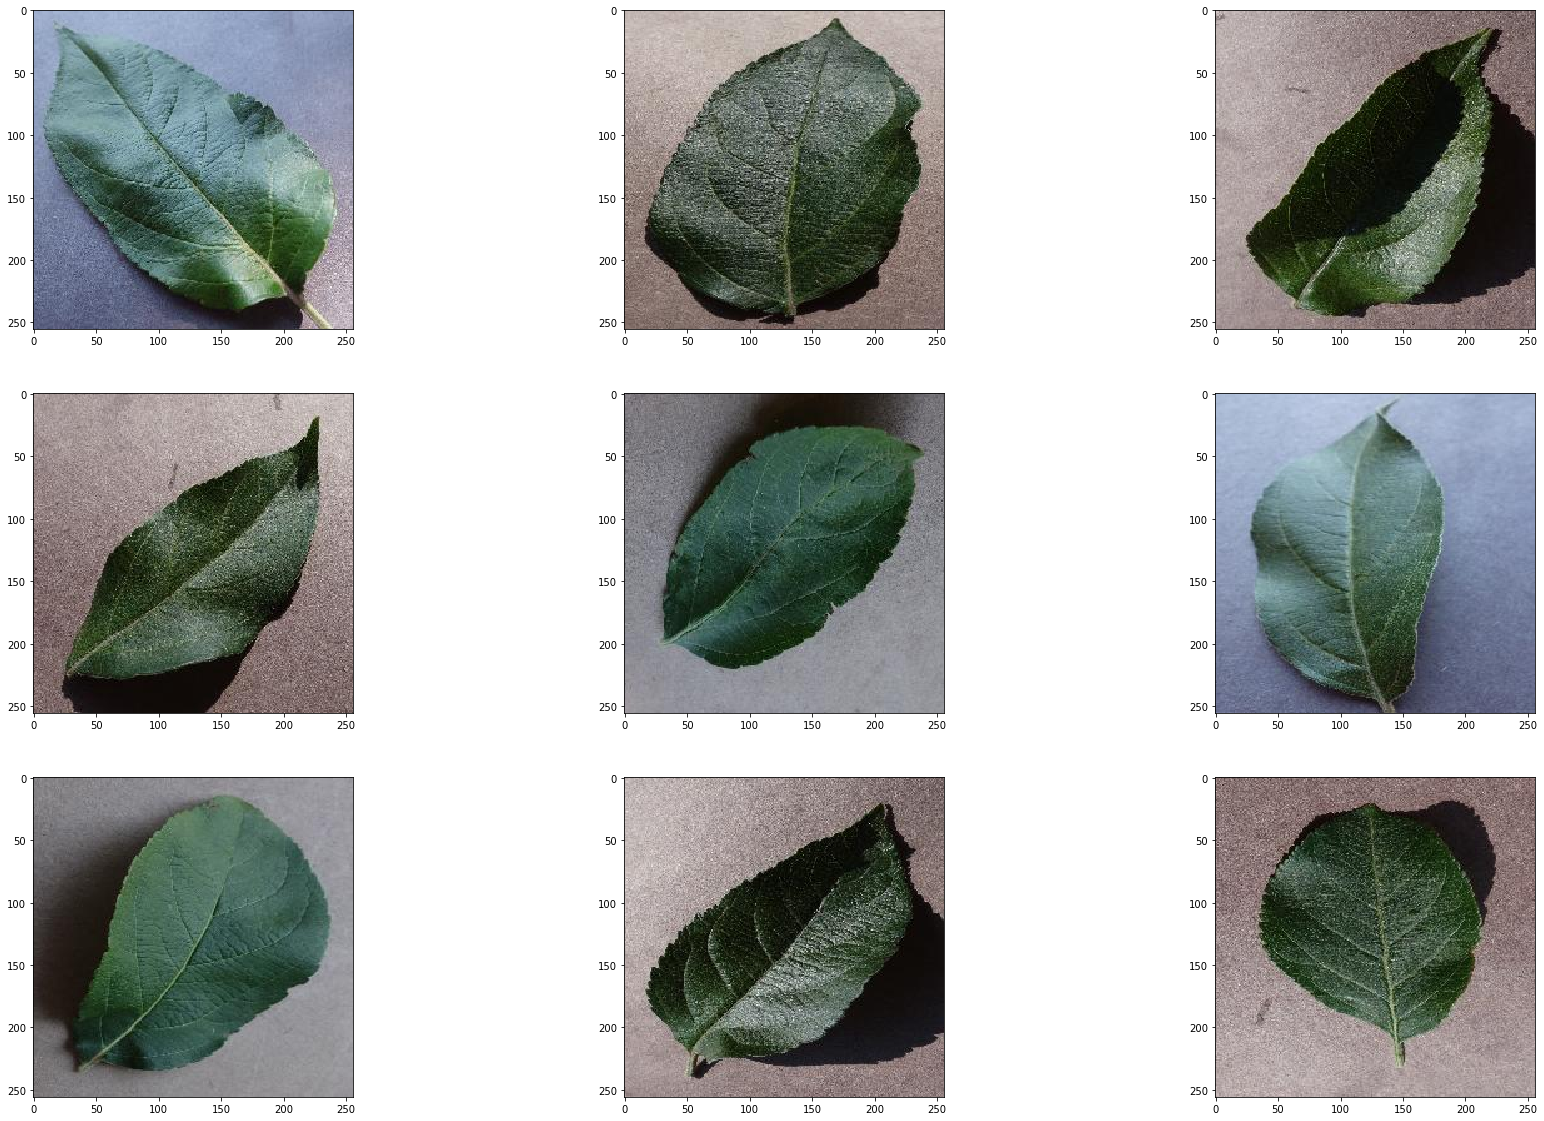

In [18]:
visualize_leaves(cond=[1, 0, 0, 0], cond_cols=["healthy"])

### scab

In [19]:
scab_sample_index = 5289
scab_sample_end = 5389

train_images = train_data["image_id"][scab_sample_index:scab_sample_end].progress_apply(load_image)

100%|██████████| 100/100 [00:00<00:00, 293.12it/s]


In [20]:
def visualize_leaves(cond=[0, 0, 0, 0], cond_cols=["healthy"], is_cond=True):
    if not is_cond:
        cols, rows = 3, min([3, len(train_images)//3])
        fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(30, rows*20/3))
        for col in range(cols):
            for row in range(rows):
                ax[row, col].imshow(train_images.loc[train_images.index[-row*3-col-1]])
        return None
        
    cond_0 = "healthy == {}".format(cond[0])
    cond_1 = "scab == {}".format(cond[1])
    cond_2 = "rust == {}".format(cond[2])
    cond_3 = "multiple_diseases == {}".format(cond[3])
    
    cond_list = []
    for col in cond_cols:
        if col == "healthy":
            cond_list.append(cond_0)
        if col == "scab":
            cond_list.append(cond_1)
        if col == "rust":
            cond_list.append(cond_2)
        if col == "multiple_diseases":
            cond_list.append(cond_3)
    
    data = train_data.loc[scab_sample_index:scab_sample_end]
    for cond in cond_list:
        data = data.query(cond)
        
    #images = train_images.loc[list(data.index)]
    images = train_images.loc[scab_sample_index:scab_sample_end]
    cols, rows = 3, min([3, len(images)//3])
    
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(30, rows*20/3))
    for col in range(cols):
        for row in range(rows):
            ax[row, col].imshow(images.loc[images.index[row*3+col]])
    plt.show()

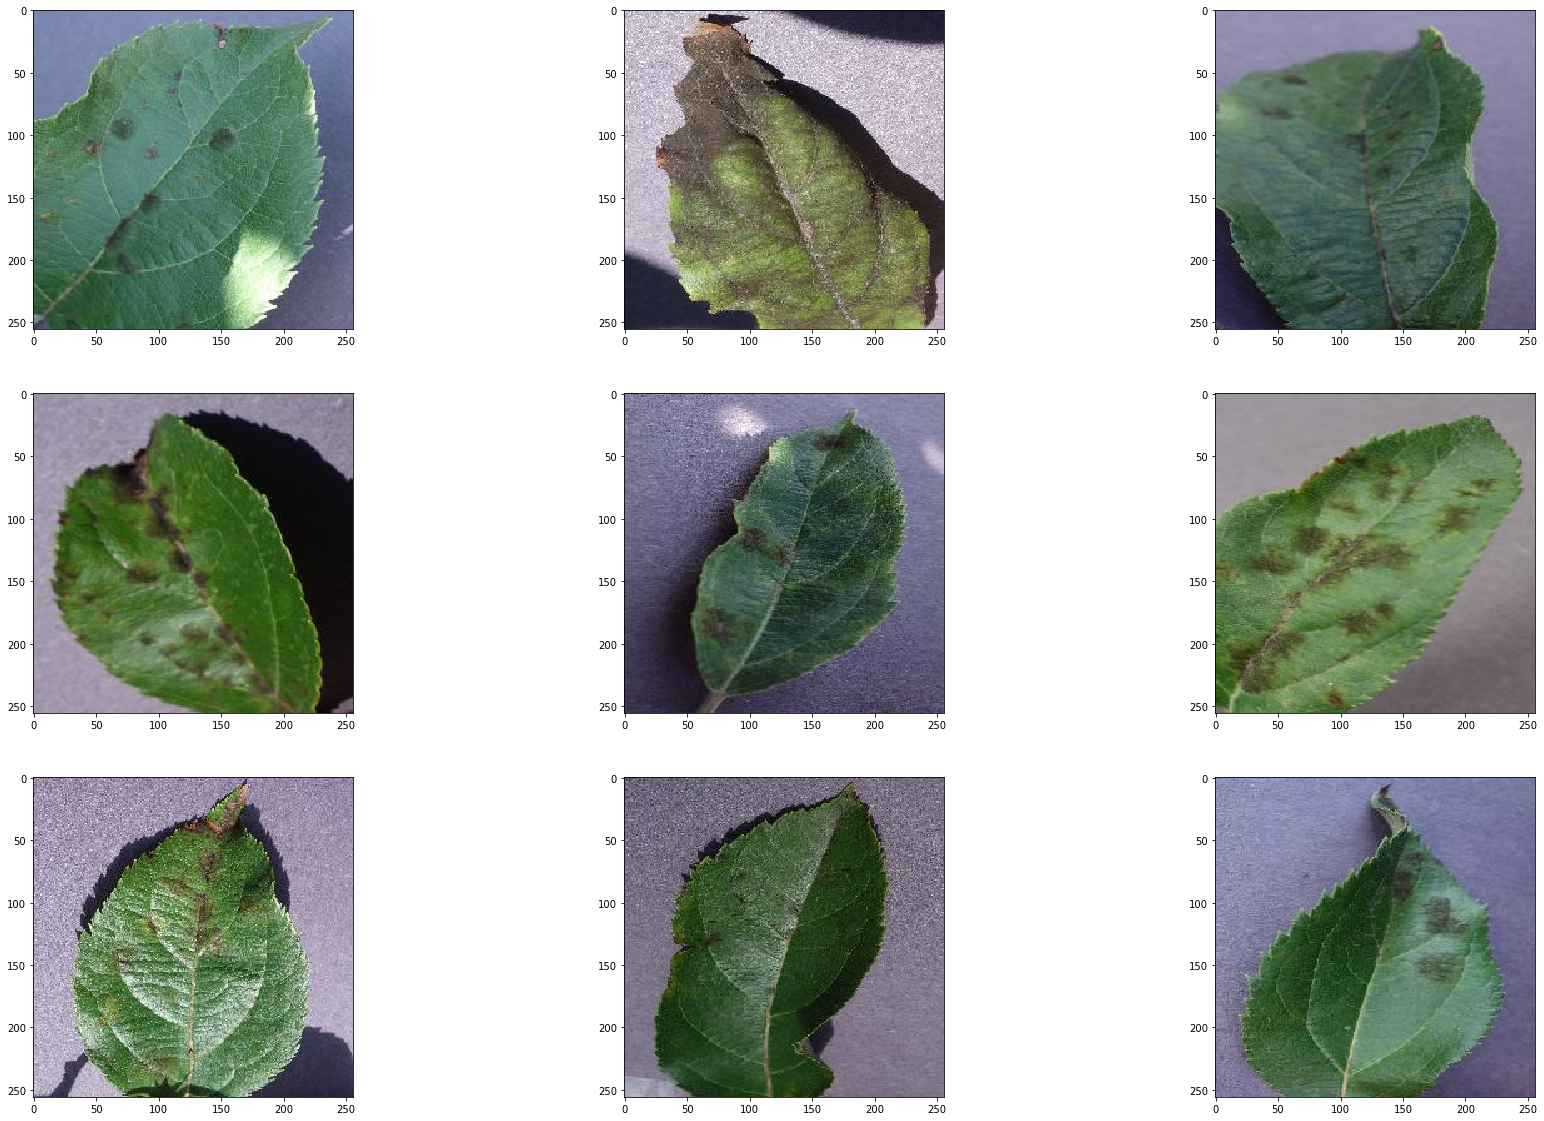

In [21]:
visualize_leaves(cond=[0, 1, 0, 0], cond_cols=["scab"])

### rust

In [22]:
rust_sample_index = 5919
rust_sample_end = 6019

train_images = train_data["image_id"][rust_sample_index:rust_sample_end].progress_apply(load_image)

100%|██████████| 100/100 [00:00<00:00, 283.21it/s]


In [23]:
def visualize_leaves(cond=[0, 0, 0, 0], cond_cols=["healthy"], is_cond=True):
    if not is_cond:
        cols, rows = 3, min([3, len(train_images)//3])
        fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(30, rows*20/3))
        for col in range(cols):
            for row in range(rows):
                ax[row, col].imshow(train_images.loc[train_images.index[-row*3-col-1]])
        return None
        
    cond_0 = "healthy == {}".format(cond[0])
    cond_1 = "scab == {}".format(cond[1])
    cond_2 = "rust == {}".format(cond[2])
    cond_3 = "multiple_diseases == {}".format(cond[3])
    
    cond_list = []
    for col in cond_cols:
        if col == "healthy":
            cond_list.append(cond_0)
        if col == "scab":
            cond_list.append(cond_1)
        if col == "rust":
            cond_list.append(cond_2)
        if col == "multiple_diseases":
            cond_list.append(cond_3)
    
    data = train_data.loc[scab_sample_index:scab_sample_end]
    for cond in cond_list:
        data = data.query(cond)
        
    #images = train_images.loc[list(data.index)]
    images = train_images.loc[rust_sample_index:rust_sample_end]
    cols, rows = 3, min([3, len(images)//3])
    
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(30, rows*20/3))
    for col in range(cols):
        for row in range(rows):
            ax[row, col].imshow(images.loc[images.index[row*3+col]])
    plt.show()

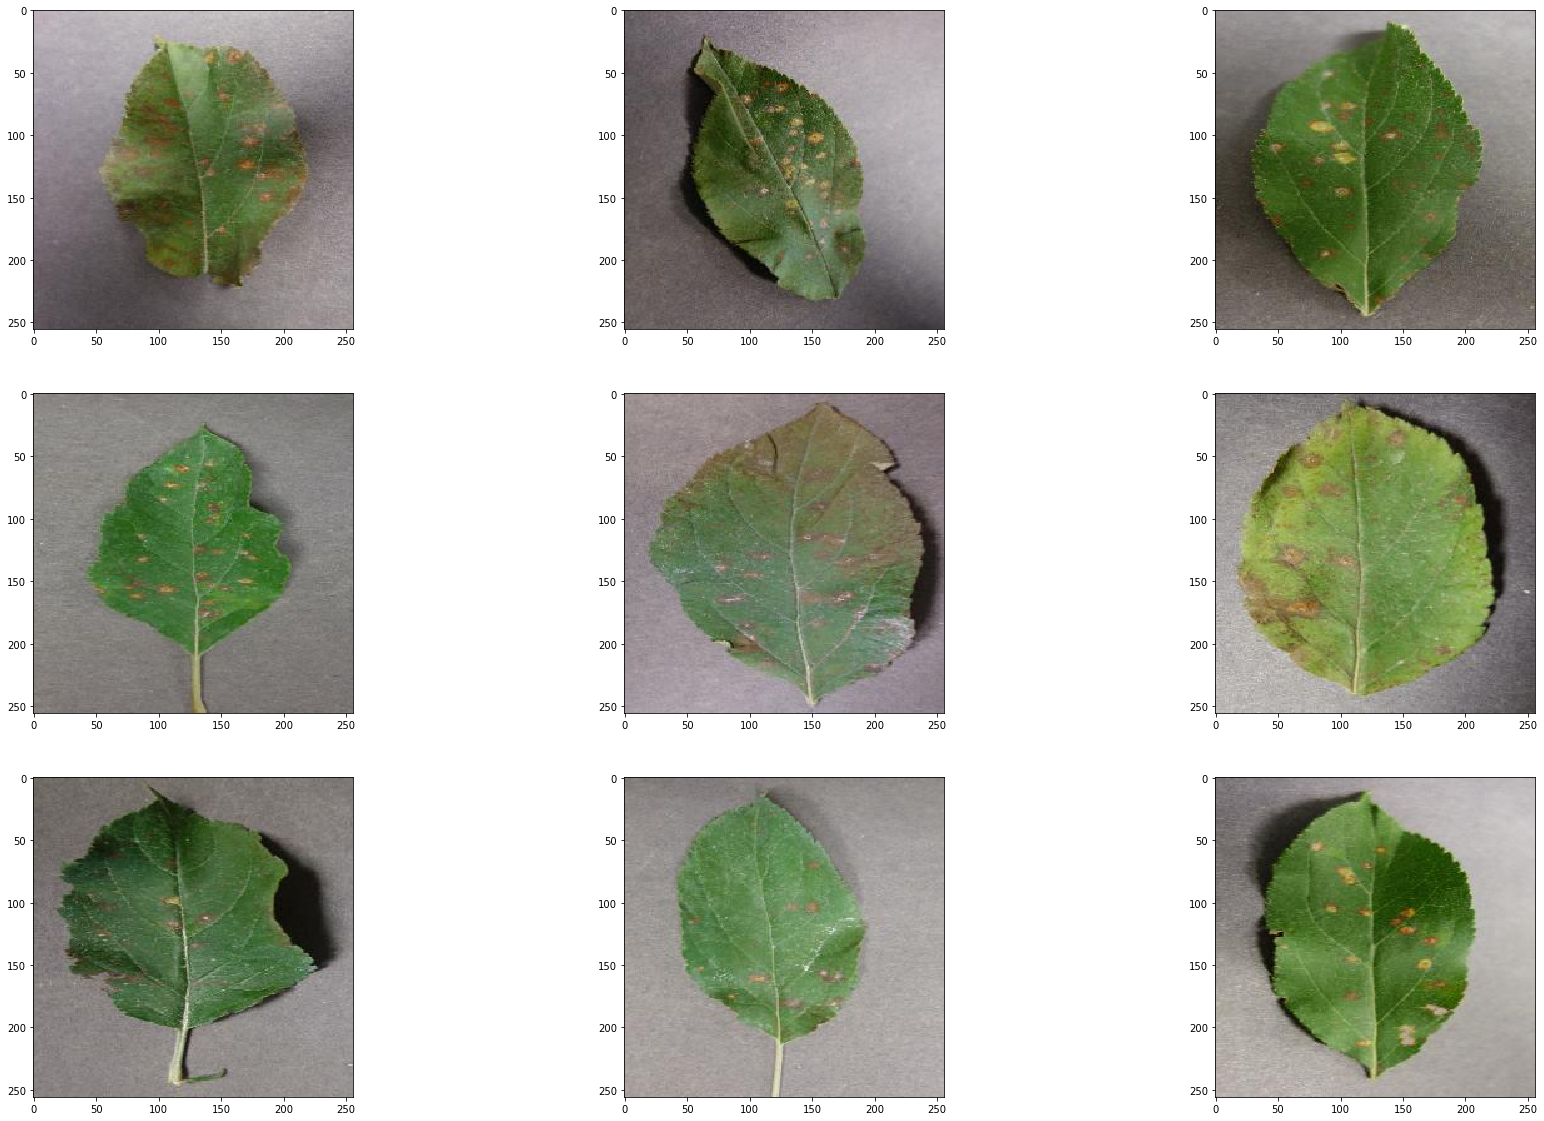

In [24]:
visualize_leaves(cond=[0, 0, 1, 0], cond_cols=["rust"])